### Things to fix/implement this PR:
[ ] The inferance is not being run on the GPU despite setting the torch.device to GPU
[ ] Allow optional parameter to specify batch size for batch scoring
[ ] Constructor option to scorer class for specifying version of ResNet to use

In [1]:
from pathlib import Path
from dataclasses import dataclass
from pprint import pprint

from PIL import Image

from modeling_notebooks.resnet_selection.resnet_scorer import OtterPredictionResult, OtterScorer

import torch
import torchvision

naro = Path("/mnt/a/data/ott-or-not/north_american_river_otter_100")

In [2]:
if torch.cuda.is_available():
    notebook_device = torch.device("cuda")
    print(f"Using CUDA backend on device '{torch.cuda.get_device_name(0)}'.")
else:
    notebook_device = torch.device("cpu")
    print("Using CPU backend.")

Using CUDA backend on device 'NVIDIA GeForce RTX 3080 Ti'.


In [3]:
scorer = OtterScorer(device=notebook_device)

In [4]:
image_of_interest = naro / "baby-otter.jpg"

In [5]:
result = scorer.score_image_at_path(image_of_interest)
pprint(result)

OtterPredictionResult(category='guinea pig',
                      category_score=0.888718843460083,
                      otter_score=0.0393759086728096,
                      file_path=PosixPath('/mnt/a/data/ott-or-not/north_american_river_otter_100/baby-otter.jpg'))


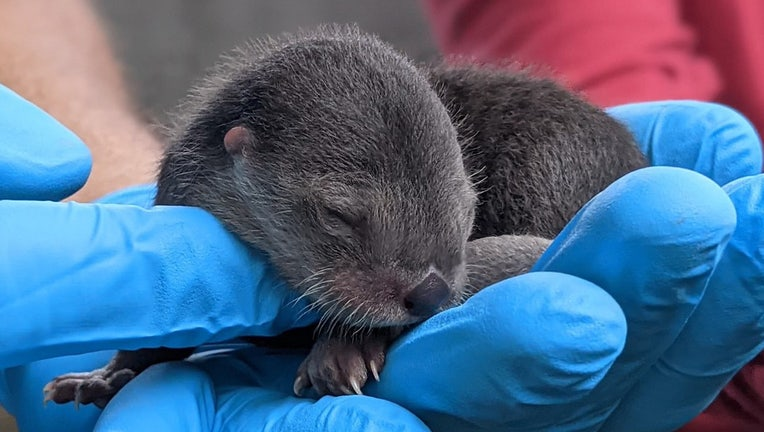

In [6]:
img = Image.open(result.file_path)
img.show()

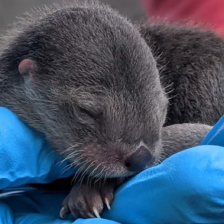

In [7]:
scorer.preprocess_image(result).show()

In [8]:
# Test batching by reading all the files in the NARO directory
naro_results = scorer.score_images_in_directory(naro)
len(naro_results)

76

In [9]:
naro_results[47]

OtterPredictionResult(category='otter', category_score=0.9271965026855469, otter_score=0.9271965026855469, file_path=PosixPath('/mnt/a/data/ott-or-not/north_american_river_otter_100/north-american-river-otter-steven-and-sylvia-oboler.jpg'))